参考文献（実装）：
https://qiita.com/everylittle/items/c088564d53cdfcde92cc

In [1]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import SGD

from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(111)
np.random.seed(111)

In [2]:
def plant(u):
    step = len(u)
    x = 0
    y = np.zeros((step,1))
    for i in range(step):
        xp = x + u[i]
        upper = 1.5
        lower = -1.5
        x = min(upper,max(lower,xp))
        y[i] = x
    return y

In [3]:
n_batch = 1024
n_epoch = 100
n = n_batch*n_epoch
u1 = np.random.uniform(-1,   1, (n, 30, 1))
u2 = np.random.uniform(-1,   1, (n, 30, 1))
u3 = np.random.uniform(-0.5, 1, (n, 30, 1))
u4 = np.random.uniform(-1, 0.5, (n, 30, 1))
u = np.zeros((n*4, 30, 1))
y = np.zeros((n*4, 30, 1))

# y = np.array([plant_siso(u[i,:]) for i in range(n)])
for i in tqdm(range(n)):
    u[4*i  ,:,:] = u1[i,:]
    u[4*i+1,:,:] = u2[i,:]
    u[4*i+1,:,:] = u3[i,:]
    u[4*i+3,:,:] = u4[i,:]
    y[4*i  ,:,:] = plant(u1[i,:])
    y[4*i+1,:,:] = plant(u2[i,:])
    y[4*i+1,:,:] = plant(u3[i,:])
    y[4*i+3,:,:] = plant(u4[i,:])

100%|███████████████████████████████████████████████████████| 102400/102400 [00:42<00:00, 2423.07it/s]


In [4]:
model = Sequential([
#    SimpleRNN(1, activation=None, input_shape=(None, 1), return_sequences=True)
    SimpleRNN(1, input_shape=(None, 1), return_sequences=True)
])
model.compile(optimizer=SGD(learning_rate=0.005), loss="mean_squared_error")
model.fit(u, y, batch_size=n_batch*4, epochs=n_epoch)

2021-11-17 23:31:40.052473: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
100/100 [==============================] - 1s 9ms/step - loss: 1.4345
Epoch 2/100
100/100 [==============================] - 1s 6ms/step - loss: 1.3413
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 1.2239
Epoch 4/100
100/100 [==============================] - 1s 6ms/step - loss: 1.1080
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 1.0394
Epoch 6/100
100/100 [==============================] - 1s 6ms/step - loss: 1.0127
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 0.9971
Epoch 8/100
100/100 [==============================] - 1s 8ms/step - loss: 0.9825
Epoch 9/100
100/100 [==============================] - 1s 7ms/step - loss: 0.9671
Epoch 10/100
100/100 [==============================] - 1s 6ms/step - loss: 0.9503
Epoch 11/100
100/100 [==============================] - 1s 6ms/step - loss: 0.9317
Epoch 12/100
100/100 [==============================] - 1s 6ms/step - loss: 0.9107
Epoch 13/100


100/100 [==============================] - 1s 7ms/step - loss: 0.4468
Epoch 100/100
100/100 [==============================] - 1s 6ms/step - loss: 0.4508


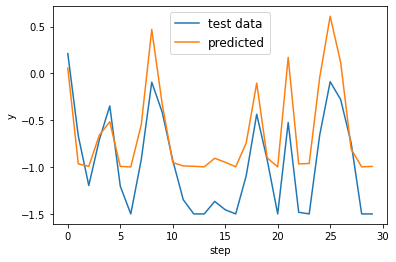

In [5]:
u_test1 = np.random.uniform(-1, 1, (1, 30, 1))
y_test1 = plant(u_test1[0,:])
y_pred1 = model.predict(u_test1).flatten()

tt = range(30)
fig, ax = plt.subplots()
ax.plot(tt, y_test1, label="test data")
ax.plot(tt, y_pred1, label="predicted")
ax.legend(fontsize=12)
ax.set_xlabel('step')
ax.set_ylabel('y')
plt.show()

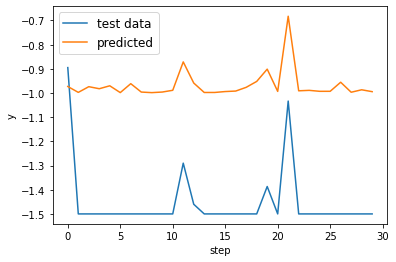

In [8]:
u_test2 = np.random.uniform(-1, 0.5, (1, 30, 1))
y_test2 = plant(u_test2[0,:])
y_pred2 = model.predict(u_test2).flatten()

fig, ax = plt.subplots()
ax.plot(tt, y_test2, label="test data")
ax.plot(tt, y_pred2, label="predicted")
ax.legend(fontsize=12)
ax.set_xlabel('step')
ax.set_ylabel('y')
plt.show()

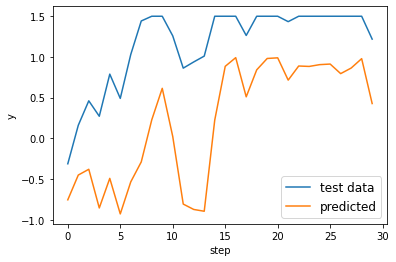

In [9]:
u_test3 = np.random.uniform(-0.5, 1, (1, 30, 1))
y_test3 = plant(u_test3[0,:])
y_pred3 = model.predict(u_test3).flatten()

fig, ax = plt.subplots()
ax.plot(tt, y_test3, label="test data")
ax.plot(tt, y_pred3, label="predicted")
ax.legend(fontsize=12)
ax.set_xlabel('step')
ax.set_ylabel('y')
plt.show()

In [10]:
model.layers[0].weights

[<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9901317]], dtype=float32)>,
 <tf.Variable 'simple_rnn/simple_rnn_cell/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.408643]], dtype=float32)>,
 <tf.Variable 'simple_rnn/simple_rnn_cell/bias:0' shape=(1,) dtype=float32, numpy=array([-0.36333823], dtype=float32)>]